# 2. DATA UNDERSTANDING (Entendimento do Negócio)

Essa etapa do CRISP-DM tem dois objetivos principais:

1. Origem dos dados – saber de onde vêm e como acessá-los.
2. Compreensão dos dados – analisar formato, qualidade, consistência e possíveis limitações.

No caso prático da Polícia Federal, os dados já são públicos e definidos, então o foco é apenas compreender as variáveis disponíveis:  
`'id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente', 
'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',  
 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos', 'latitude' 
 , 'longitude', 'regional', 'delegacia', 'uop'`.

Em cenários reais, poderíamos enriquecer essa análise incorporando outros dados públicos, por exemplo:  
- **IBGE**: cruzando `municipio` e `uf` para entender influência de fatores socioeconômicos e densidade populacional nos acidentes.  
- **DETRAN**: cruzando `municipio` e `uf` para avaliar se a frota de veículos ou habilitações influencia na ocorrência de acidentes.  

Para este case específico, vamos **utilizar apenas os dados da PRF**, mantendo o escopo restrito.

## Bibliotecas / Configuração

In [1]:
# Dependências
#!pip install pandas numpy matplotlib seaborn -q

In [2]:
### Mapeando bibliotecas necessárias para o projeto

# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração
pd.set_option('display.max_columns', None) # Visualizar todas as colunas
pd.set_option('display.max_rows', 100)     # Visualizar 100 linhas
pd.set_option('display.width', None)       # Exibe todas as colunas em uma única linha, sem limite de largura

print('Ambiente Preparado')

Ambiente Preparado


## Carregamento dos Dados

In [3]:
# Caminho do arquivo
file_path = '../../dados/raw/Dados_PRF_2024.csv'

# Carregando o dataset
abt00 = pd.read_csv(file_path, encoding = 'ISO-8859-1', sep = ';')  # csv (encoding normalmente utiliza-se o iso-8859-1 , utf-8, latin-1)

print('Dataset carregado')

Dataset carregado


### Informações básicas

In [4]:
# Informações básicas
print(' INFORMAÇÕES BÁSICAS')
print('='*30)

print(f"📊 Dataset carregado: {abt00.shape[0]:,} registros e {abt00.shape[1]} colunas")

colunas_data = [col for col in abt00.columns if 'data' in col.lower() or 'date' in col.lower()]

if colunas_data:
    coluna = colunas_data[0]
    print(f"📅 Período: {abt00[coluna].min()} a {abt00[coluna].max()}")

 INFORMAÇÕES BÁSICAS
📊 Dataset carregado: 73,156 registros e 30 colunas
📅 Período: 2024-01-01 a 2024-12-31


## Conhecendo as variáveis

In [5]:
# Tipos de dados 
print(' TIPOS DE DADOS:')
print('='*30)

tipos = abt00.dtypes.value_counts()
for tipo, quantidade in tipos.items():
    print(f'{str(tipo):8}: {quantidade} variáveis')

print(f'\n📊 Total: {len(abt00.columns)} variáveis')

print('\n DETALHAMENTO POR VARIÁVEL:')
for col in abt00.columns:
    tipo = str(abt00[col].dtype)
    if tipo == 'object':
        tipo_real = '📝 Texto/Categórica'
    elif 'int' in tipo:
        tipo_real = '🔢 Número Inteiro'
    elif 'float' in tipo:
        tipo_real = '🔢 Número Decimal'
    else:
        tipo_real = f'❓ {tipo}'
    
    print(f'{col:22} → {tipo_real}')

 TIPOS DE DADOS:
object  : 18 variáveis
int64   : 9 variáveis
float64 : 3 variáveis

📊 Total: 30 variáveis

 DETALHAMENTO POR VARIÁVEL:
id                     → 🔢 Número Decimal
data_inversa           → 📝 Texto/Categórica
dia_semana             → 📝 Texto/Categórica
horario                → 📝 Texto/Categórica
uf                     → 📝 Texto/Categórica
br                     → 🔢 Número Inteiro
km                     → 📝 Texto/Categórica
municipio              → 📝 Texto/Categórica
causa_acidente         → 📝 Texto/Categórica
tipo_acidente          → 📝 Texto/Categórica
classificacao_acidente → 📝 Texto/Categórica
fase_dia               → 📝 Texto/Categórica
sentido_via            → 📝 Texto/Categórica
condicao_metereologica → 📝 Texto/Categórica
tipo_pista             → 📝 Texto/Categórica
tracado_via            → 📝 Texto/Categórica
uso_solo               → 📝 Texto/Categórica
pessoas                → 🔢 Número Inteiro
mortos                 → 🔢 Número Inteiro
feridos_leves          → 🔢 Número In

## Qualidade dos dados

### Duplicados

In [6]:
# Verificação de duplicatas
print(' ANÁLISE DE DUPLICATAS:')
print('='*30)

duplicatas_totais = abt00.duplicated().sum()
print(f'Registros duplicados: {duplicatas_totais:,}')

if duplicatas_totais > 0:
    pct_duplicatas = (duplicatas_totais / len(abt00)) * 100
    print(f'Percentual de duplicatas: {pct_duplicatas:.2f}%')
    print('⚠️ Atenção: Há registros duplicados que podem precisar ser removidos')
else:
    print('✅ Nenhuma duplicata encontrada')

# Verificar duplicatas por ID (se existir)
if 'id' in abt00.columns:
    ids_duplicados = abt00['id'].duplicated().sum()
    print(f'\nIDs duplicados: {ids_duplicados:,}')
    if ids_duplicados > 0:
        print('⚠️ Atenção: IDs duplicados podem indicar problema nos dados')

 ANÁLISE DE DUPLICATAS:
Registros duplicados: 0
✅ Nenhuma duplicata encontrada

IDs duplicados: 0


### Valores Faltantes

ANÁLISE DE VALORES FALTANTES:

⚠️ Valores faltantes em 4 variáveis:
uop                    → 112 (0.2%)
delegacia              → 36 (0.0%)
regional               → 3 (0.0%)
classificacao_acidente → 1 (0.0%)



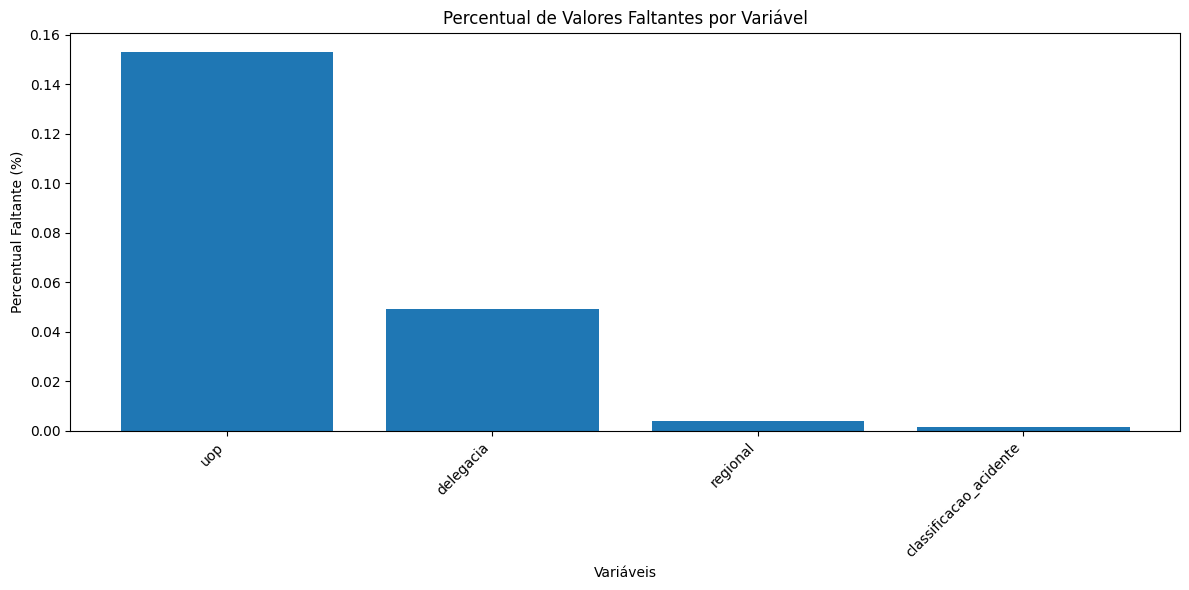

In [7]:
# Análise de valores faltantes 
def analisar_valores_faltantes(df):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Variável': missing.index,
        'Valores_Faltantes': missing.values,
        'Percentual': missing_pct.values
    })
    
    # Ordenar por percentual de faltantes
    missing_df = missing_df.sort_values('Percentual', ascending=False)
    
    return missing_df[missing_df['Valores_Faltantes'] > 0]

valores_faltantes = analisar_valores_faltantes(abt00)

print('ANÁLISE DE VALORES FALTANTES:')
print('='*40)

if len(valores_faltantes) == 0:
    print('✅ Excelente! Nenhum valor faltante encontrado')
else:
    print(f'\n⚠️ Valores faltantes em {len(valores_faltantes)} variáveis:')

    for _, row in valores_faltantes.iterrows():
        print(f"{row['Variável']:22} → {row['Valores_Faltantes']:,} ({row['Percentual']:.1f}%)")
    
    # Visualização dos valores faltantes
    if len(valores_faltantes) > 0:
        print()
        plt.figure(figsize=(12, 6))
        plt.bar(valores_faltantes['Variável'], valores_faltantes['Percentual'])
        plt.title('Percentual de Valores Faltantes por Variável')
        plt.xlabel('Variáveis')
        plt.ylabel('Percentual Faltante (%)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

- Valores Nulos: Algumas colunas, como uop, delegacia, regional e classificacao_acidente, têm menos observações do que o total de registros, indicando a presença de valores nulos.

In [8]:
# Verificando as informações do Dataset
def tabela_info(df):
    tabela = pd.DataFrame({
        'variavel': df.columns,
        'tipo': df.dtypes.astype(str),
        'n_nulos': df.isna().sum(),
        'Nulos_%': (df.isna().mean() * 100).round(2),
        'Cardinalidade': df.nunique(),
        'n_negativos': df.select_dtypes('number').apply(lambda x: (x < 0).sum()).reindex(df.columns, fill_value=None),
        'espacos_vazios': df.select_dtypes('object').apply(lambda x: (x.str.strip() == '').sum()).reindex(df.columns, fill_value=None)
    }).reset_index(drop=True)

    # Ajustar tipo mais legível
    tabela['tipo'] = tabela['tipo'].replace({
        'object': 'categorica',
        'category': 'categorica',
        'int64': 'numerica',
        'float64': 'numerica',
        'datetime64[ns]': 'data'
    })
    # Ordenando pela coluna Tipo
    #tabela = tabela.sort_values('tipo', ascending=False)
    return tabela

# Executar a função
metadados = tabela_info(abt00)
metadados

,variavel,tipo,n_nulos,Nulos_%,Cardinalidade,n_negativos,espacos_vazios
0,id,numerica,0,0.00,73156,0.0,NaN
1,data_inversa,categorica,0,0.00,366,NaN,0.0
2,dia_semana,categorica,0,0.00,7,NaN,0.0
3,horario,categorica,0,0.00,1415,NaN,0.0
4,uf,categorica,0,0.00,27,NaN,0.0
5,br,numerica,0,0.00,113,0.0,NaN
6,km,categorica,0,0.00,7683,NaN,0.0
7,municipio,categorica,0,0.00,1833,NaN,0.0
8,causa_acidente,categorica,0,0.00,69,NaN,0.0
9,tipo_acidente,categorica,0,0.00,17,NaN,0.0


## Conteúdo das Variáveis

In [9]:
# Amostra dos dados 
print('AMOSTRA DOS DADOS:')
print('='*25)
print('\n PRIMEIRAS 3 LINHAS:')
display(abt00.head(3))

print('\n ÚLTIMAS 3 LINHAS:')
display(abt00.tail(3))

print('\n AMOSTRA ALEATÓRIA:')
display(abt00.sample(3))

AMOSTRA DOS DADOS:

 PRIMEIRAS 3 LINHAS:


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,NaN,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,3,0,0,1,1,1,1,3,-18.482610,-39.923790,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,Com Vítimas Fatais,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Sim,2,1,0,0,1,0,0,2,-4.296033,-41.767327,SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,3,1,0,0,1,2,0,4,-13.071583,-39.961111,SPRF-BA,DEL03-BA,UOP02-DEL03-BA



 ÚLTIMAS 3 LINHAS:


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
73153,661377.0,2024-07-09,terça-feira,16:20:00,ES,101,"101,5",SOORETAMA,Desrespeitar a preferência no cruzamento,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Interseção de Vias,Não,3,0,3,0,0,0,3,2,-18.988339,-39.999335,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
73154,661576.0,2024-12-17,terça-feira,21:35:00,RJ,101,391,RIO DE JANEIRO,Frear bruscamente,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,2,0,1,0,1,0,1,2,-22.894827,-43.684920,SPRF-RJ,DEL03-RJ,UOP01-DEL03-RJ
73155,661598.0,2024-12-27,sexta-feira,13:00:00,ES,101,67,SAO MATEUS,Conversão proibida,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Reta,Não,4,0,1,2,0,1,3,3,-18.720540,-39.865893,SPRF-ES,DEL04-ES,UOP02-DEL04-ES



 AMOSTRA ALEATÓRIA:


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
68798,646681.0,2024-12-07,sábado,03:00:00,RO,364,689,CANDEIAS DO JAMARI,Condutor Dormindo,Capotamento,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,2,0,1,0,1,0,1,1,-8.794285,-63.668926,SPRF-RO,DEL01-RO,UOP01-DEL01-RO
6155,599699.0,2024-05-11,sábado,07:50:00,SC,282,"500,2",XANXERE,Conversão proibida,Colisão lateral mesmo sentido,Sem Vítimas,Pleno dia,Crescente,Nublado,Dupla,Interseção de Vias;Reta,Sim,2,0,0,0,2,0,0,2,-26.881372,-52.372520,SPRF-SC,DEL07-SC,UOP01-DEL07-SC
59090,632554.0,2024-10-04,sexta-feira,13:30:00,RJ,40,94,DUQUE DE CAXIAS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Dupla,Curva;Declive,Não,4,0,2,0,2,0,2,1,-22.557633,-43.265744,SPRF-RJ,DEL01-RJ,UOP01-DEL01-RJ


## Análise

In [10]:
# Parâmetros de ajuste
IGNORE_COLS = ['id']

In [11]:
# Separando os dados por tipo de colunas
numericos = abt00.select_dtypes(include=['int64', 'float64']).drop(columns=IGNORE_COLS, errors='ignore')
categoricos = abt00.select_dtypes(include=['object']).drop(columns=IGNORE_COLS, errors='ignore')

### Variáveis categóricas

In [12]:
# Exploração de variáveis categóricas
def explorar_categoricas(df, max_unique=20):
    categoricas = df.select_dtypes(include=['object']).columns
    
    print('VARIÁVEIS CATEGÓRICAS:')
    print('='*30)
    
    for col in categoricas:
        unique_count = df[col].nunique()
        print(f'\n🏷️ {col.upper()}:')
        print(f'   Valores únicos: {unique_count:,}')
        
        if unique_count <= max_unique:
            print('   Valores e frequências:')
            value_counts = df[col].value_counts()
            for valor, freq in value_counts.head(10).items():
                pct = (freq / len(df)) * 100
                print(f'      {valor}: {freq:,} ({pct:.1f}%)')
            
            if len(value_counts) > 10:
                print(f'      ... e mais {len(value_counts) - 10} valores')
        else:
            print(f'   ⚠️ Muitos valores únicos ({unique_count:,}) - variável de alta cardinalidade')
            print('   Amostra dos valores:')
            sample_values = df[col].dropna().unique()[:5]
            for valor in sample_values:
                print(f'      {valor}')

explorar_categoricas(abt00)

VARIÁVEIS CATEGÓRICAS:

🏷️ DATA_INVERSA:
   Valores únicos: 366
   ⚠️ Muitos valores únicos (366) - variável de alta cardinalidade
   Amostra dos valores:
      2024-01-01
      2024-01-02
      2024-01-03
      2024-01-04
      2024-01-05

🏷️ DIA_SEMANA:
   Valores únicos: 7
   Valores e frequências:
      domingo: 11,741 (16.0%)
      sábado: 11,641 (15.9%)
      sexta-feira: 11,300 (15.4%)
      segunda-feira: 10,208 (14.0%)
      quinta-feira: 9,570 (13.1%)
      quarta-feira: 9,384 (12.8%)
      terça-feira: 9,312 (12.7%)

🏷️ HORARIO:
   Valores únicos: 1,415
   ⚠️ Muitos valores únicos (1,415) - variável de alta cardinalidade
   Amostra dos valores:
      03:56:00
      04:50:00
      04:30:00
      06:30:00
      05:00:00

🏷️ UF:
   Valores únicos: 27
   ⚠️ Muitos valores únicos (27) - variável de alta cardinalidade
   Amostra dos valores:
      ES
      PI
      BA
      SE
      MT

🏷️ KM:
   Valores únicos: 7,683
   ⚠️ Muitos valores únicos (7,683) - variável de alta cardinal

#### Estatística Descritiva

In [13]:
# Estatística descritiva apenas para categóricas
abt00[categoricos.columns].describe()

,data_inversa,dia_semana,horario,uf,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,regional,delegacia,uop
count,73156,73156,73156,73156,73156,73156,73156,73156,73155,73156,73156,73156,73156,73156,73156,73153,73120,73044
unique,366,7,1415,27,7683,1833,69,17,3,4,3,10,3,659,2,28,152,394
top,2024-12-21,domingo,19:00:00,MG,1,BRASILIA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,319,11741,1117,9296,365,1056,10920,13960,56154,40284,39281,46271,35287,40498,41705,9267,2667,1245


#### Analisando os dados Visualmente 

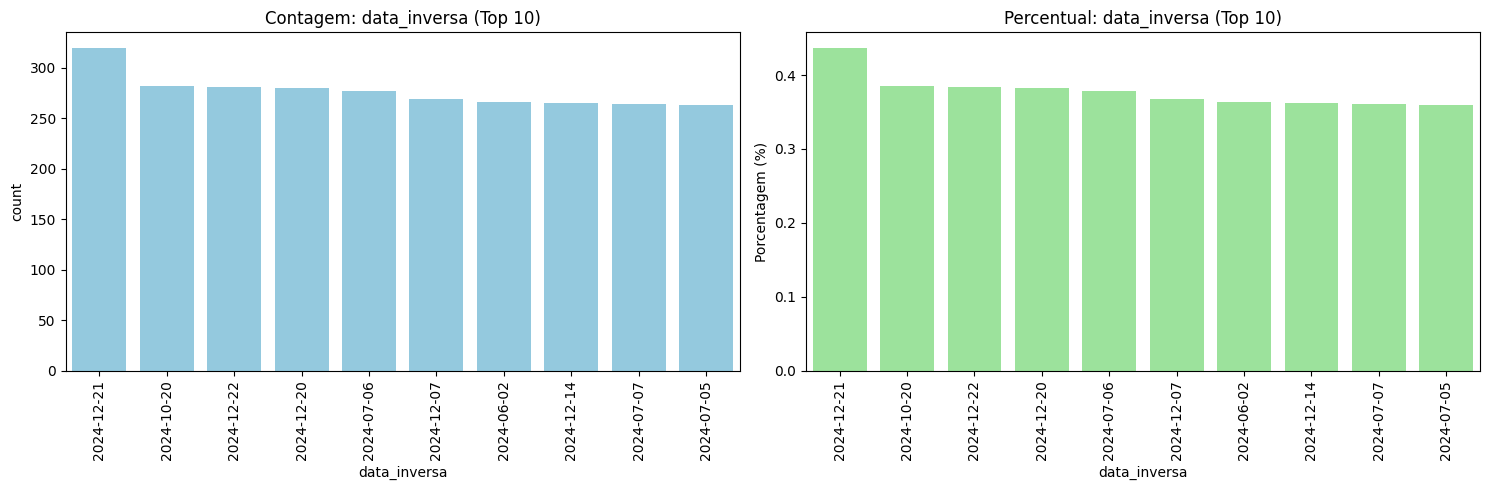

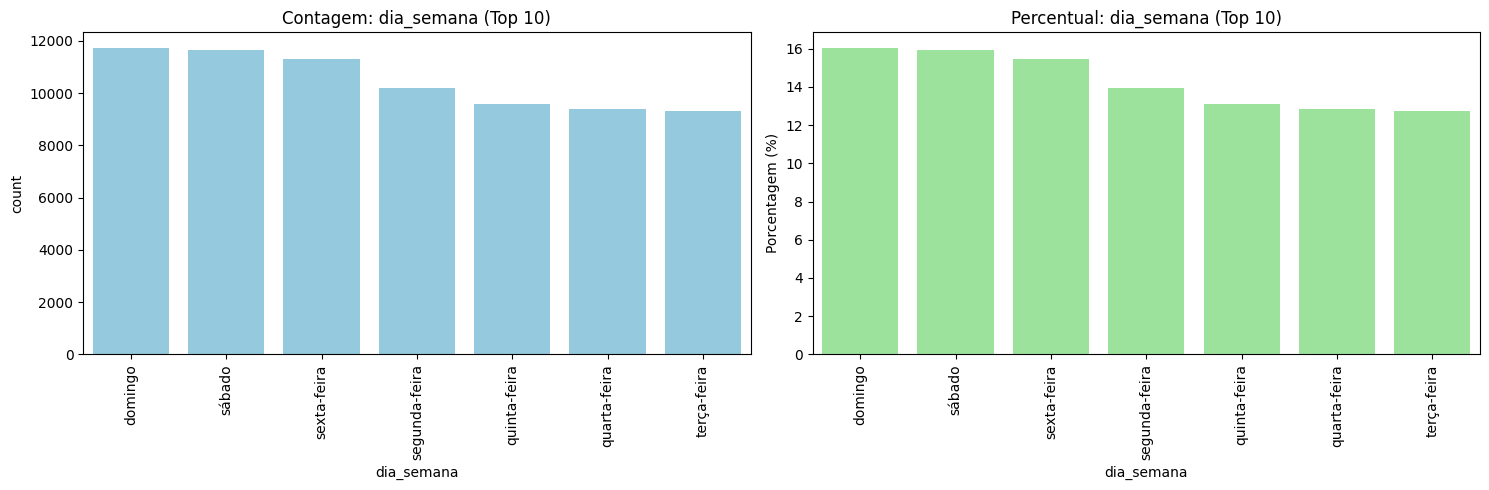

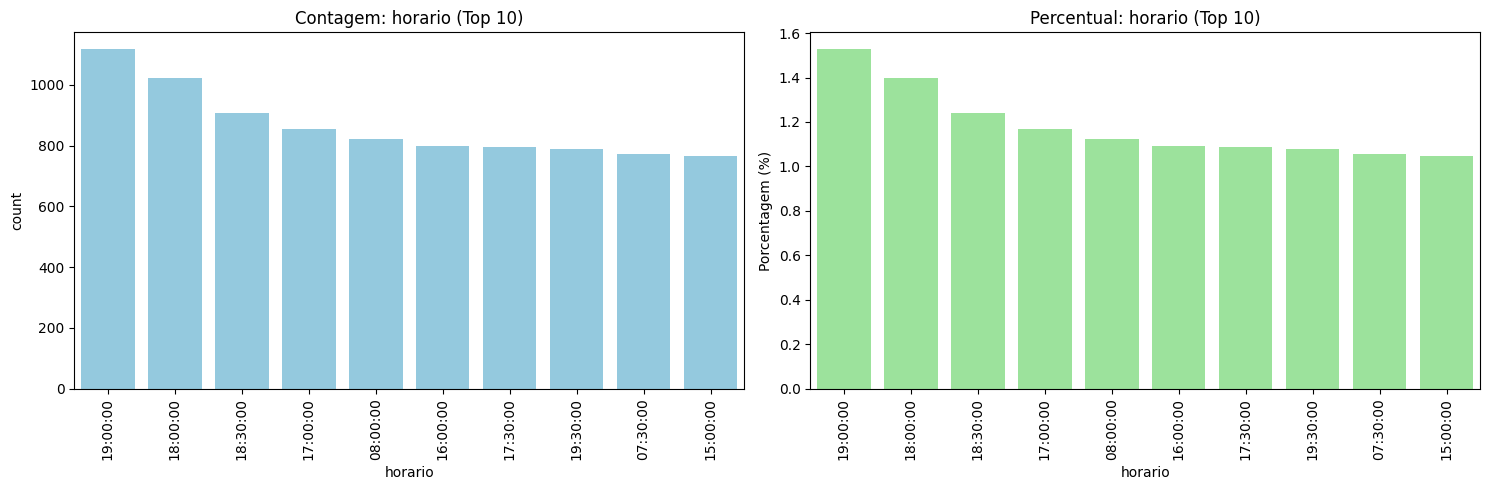

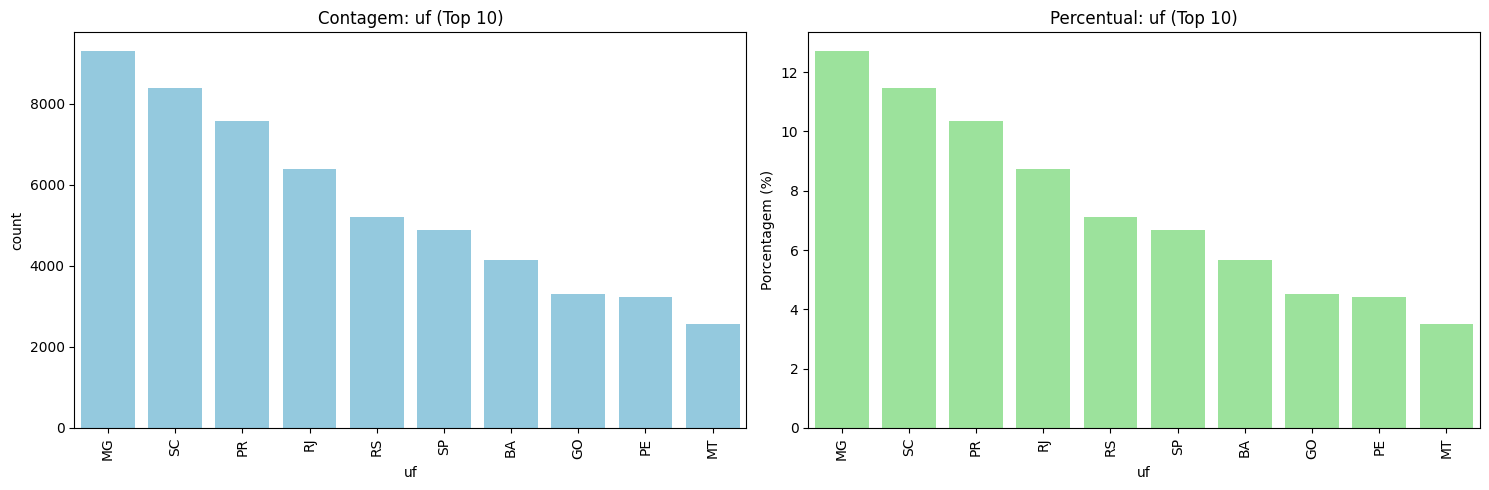

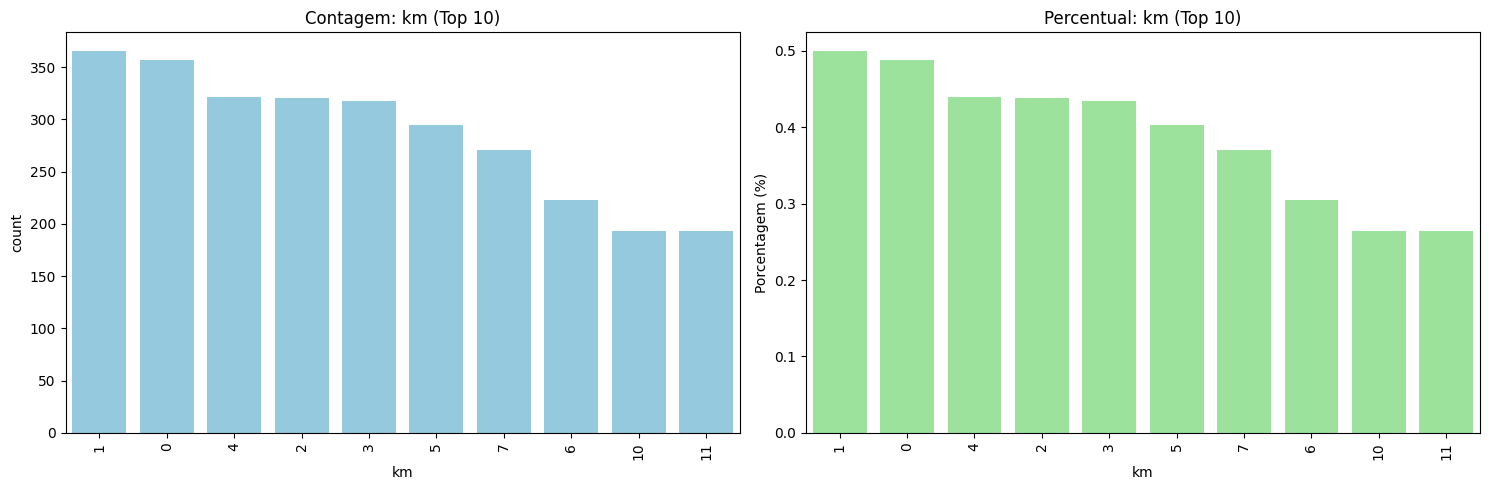

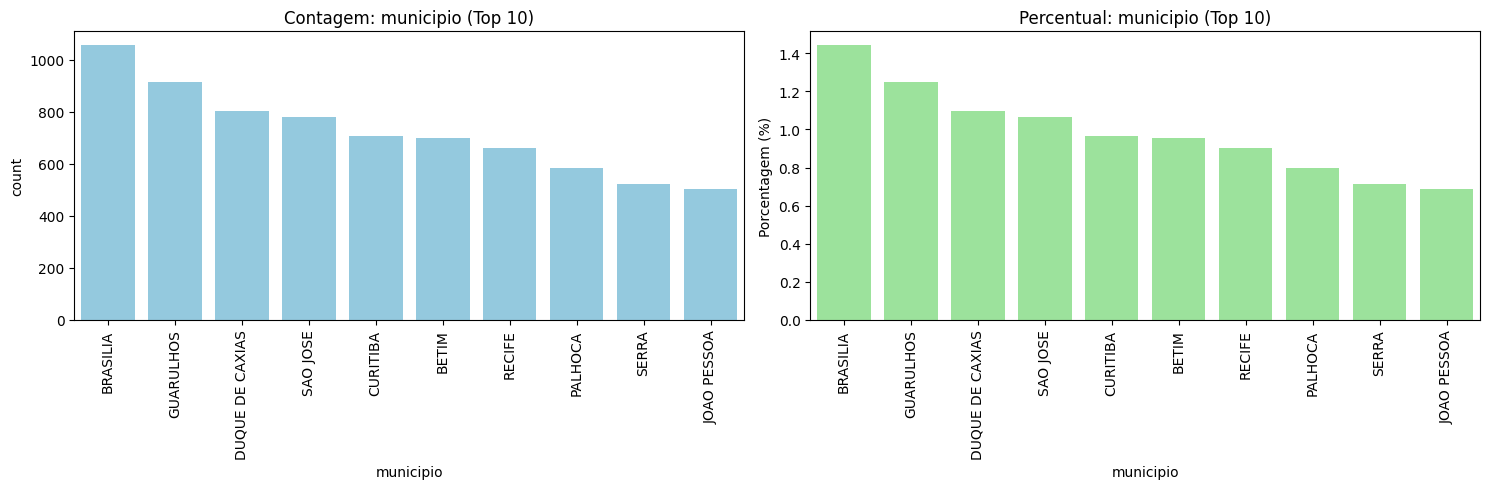

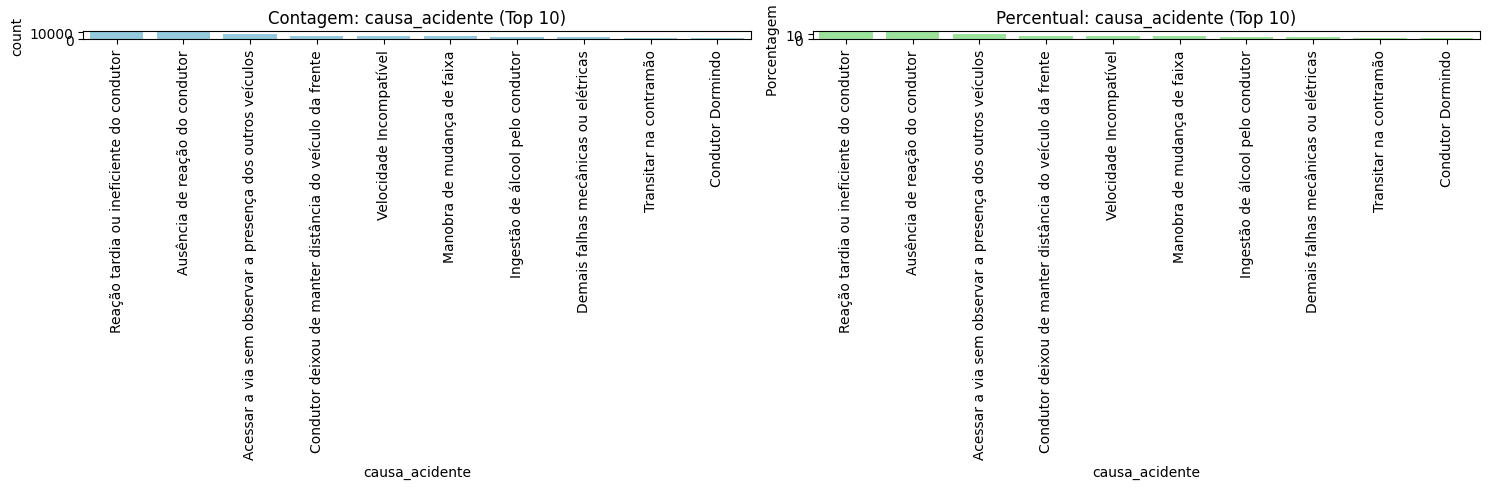

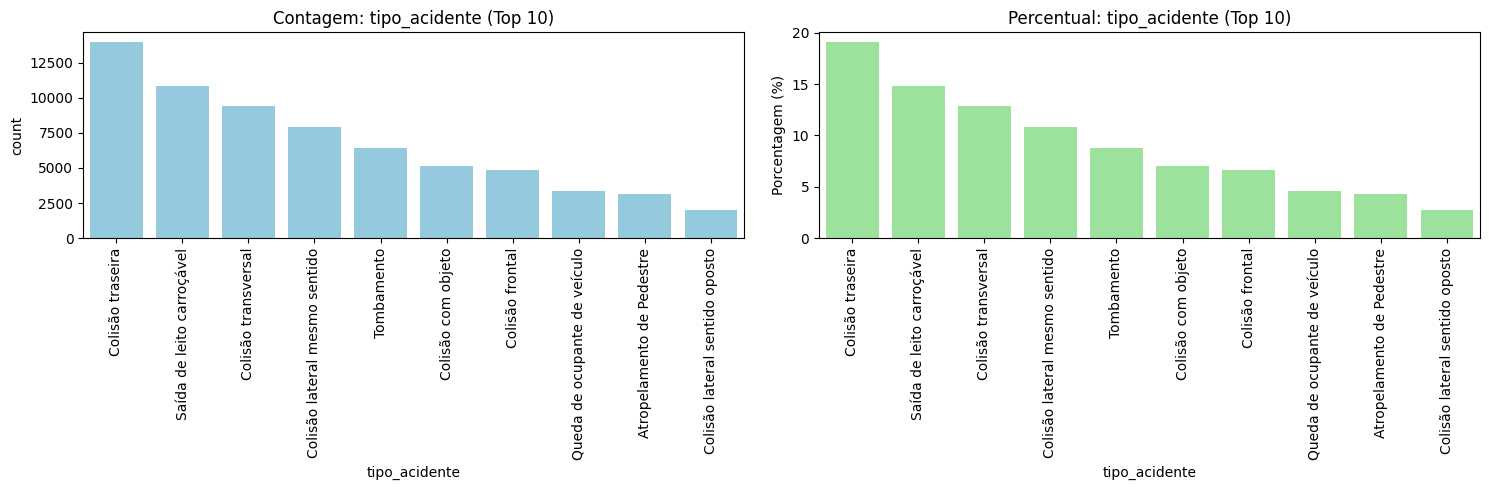

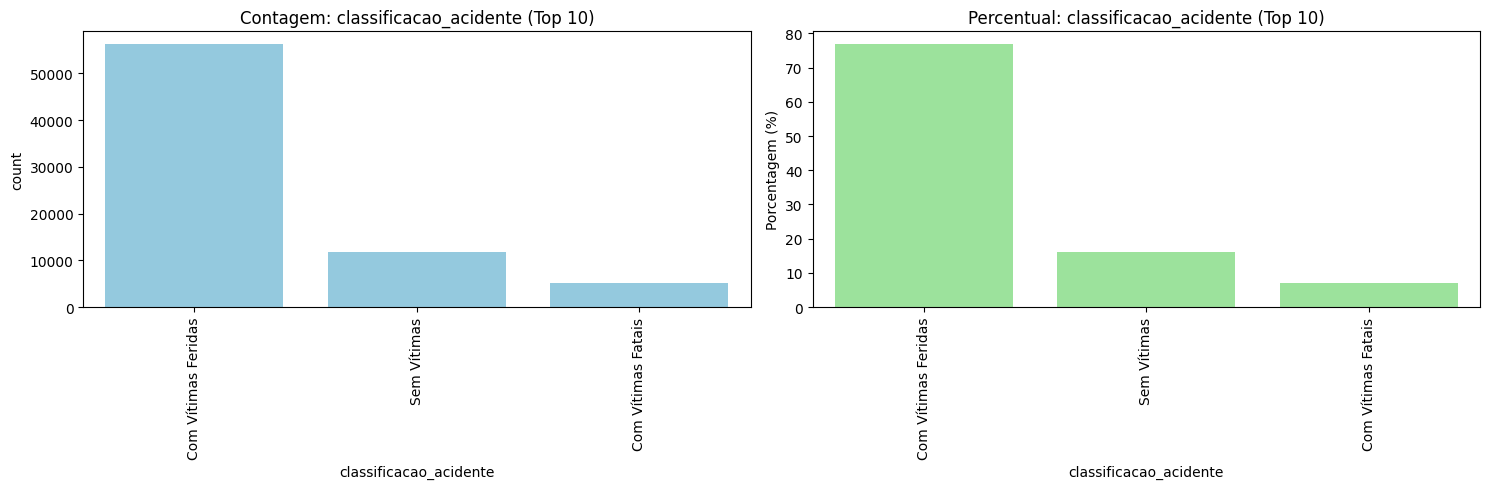

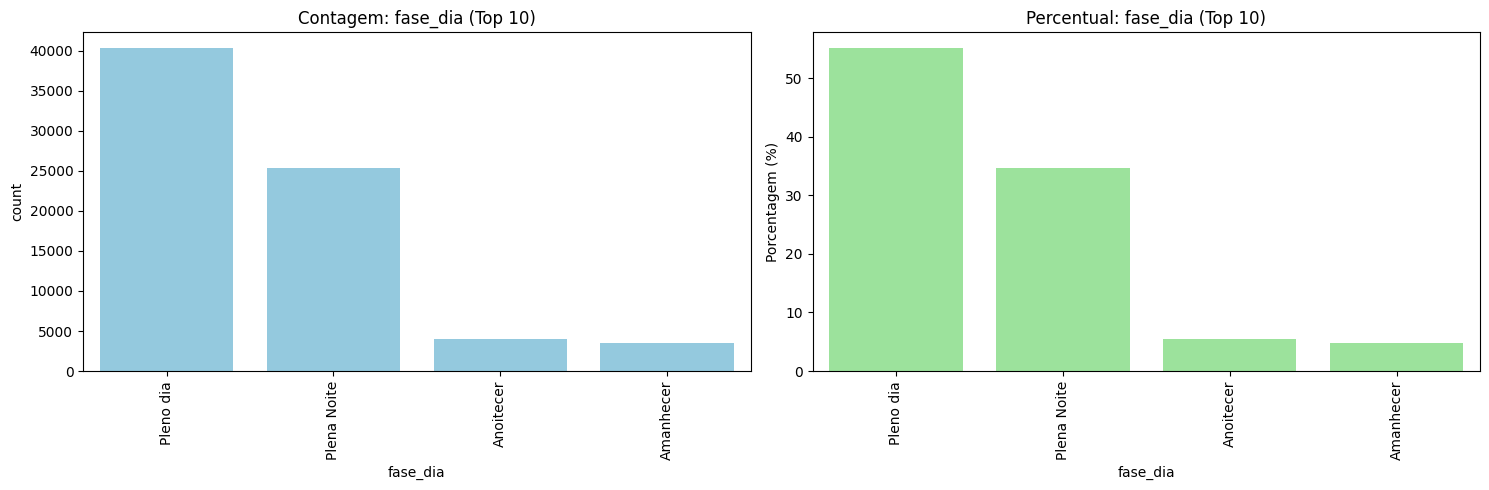

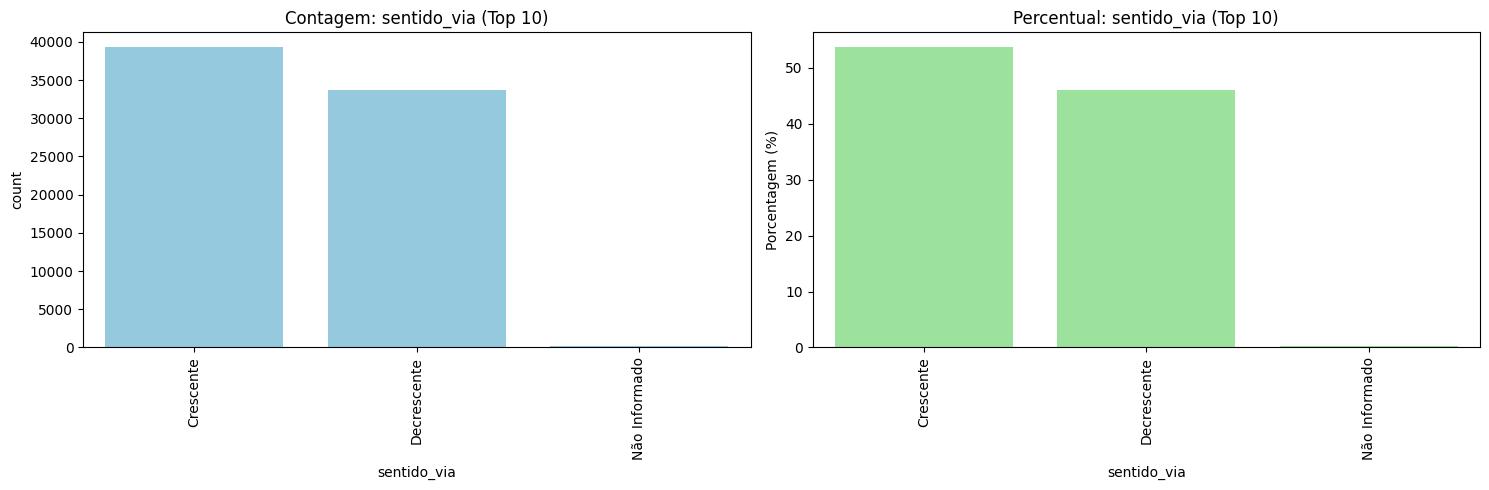

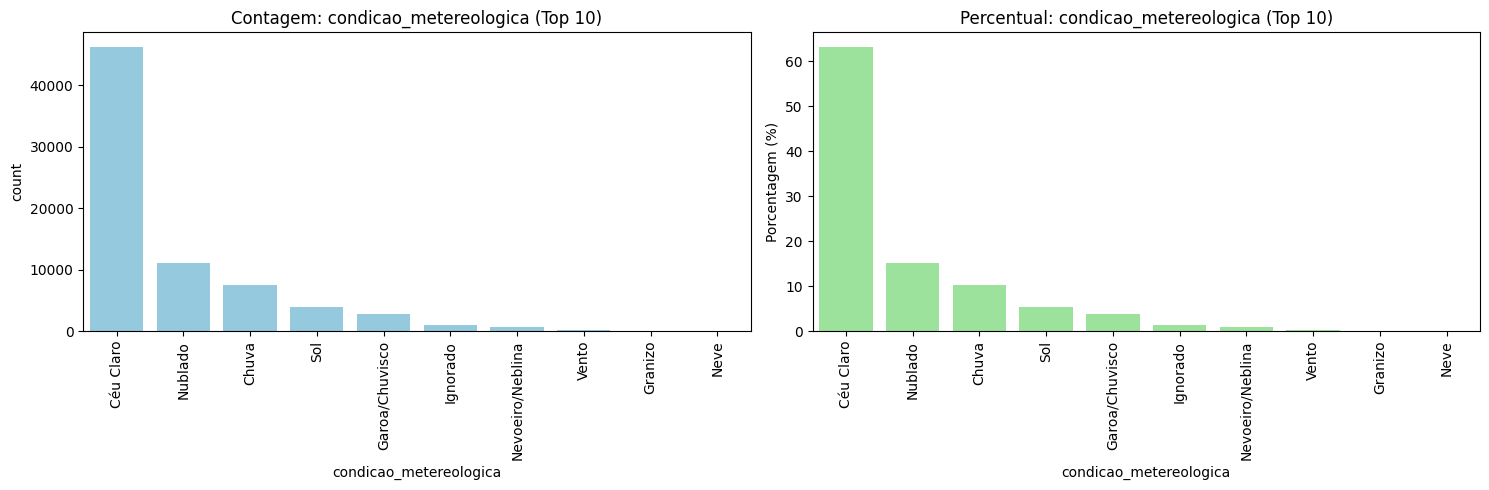

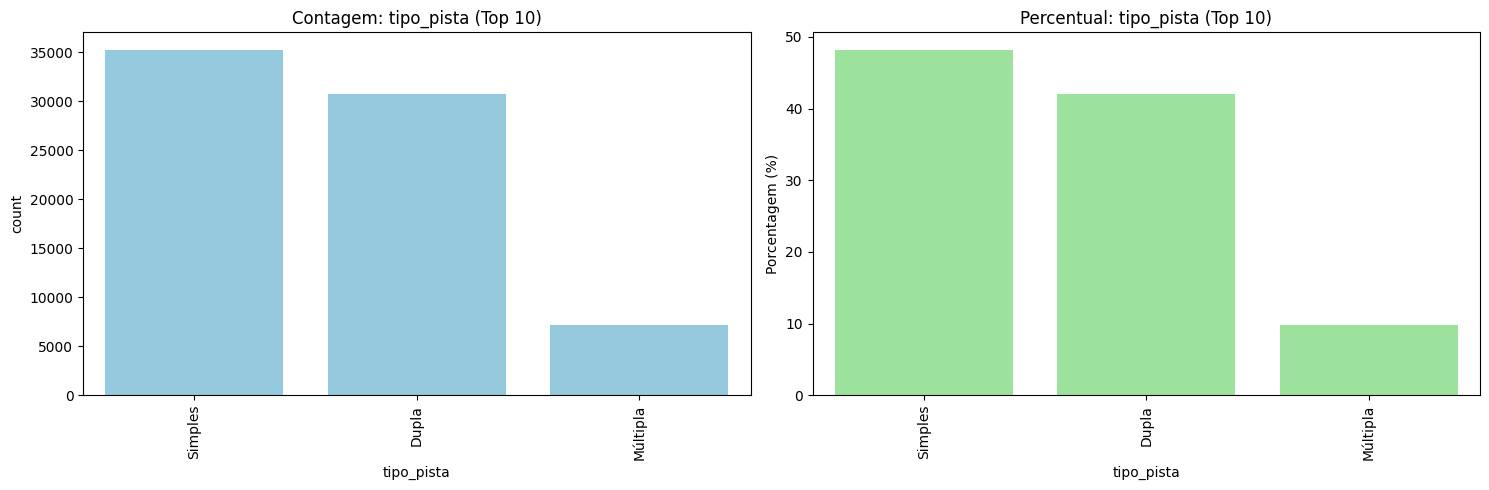

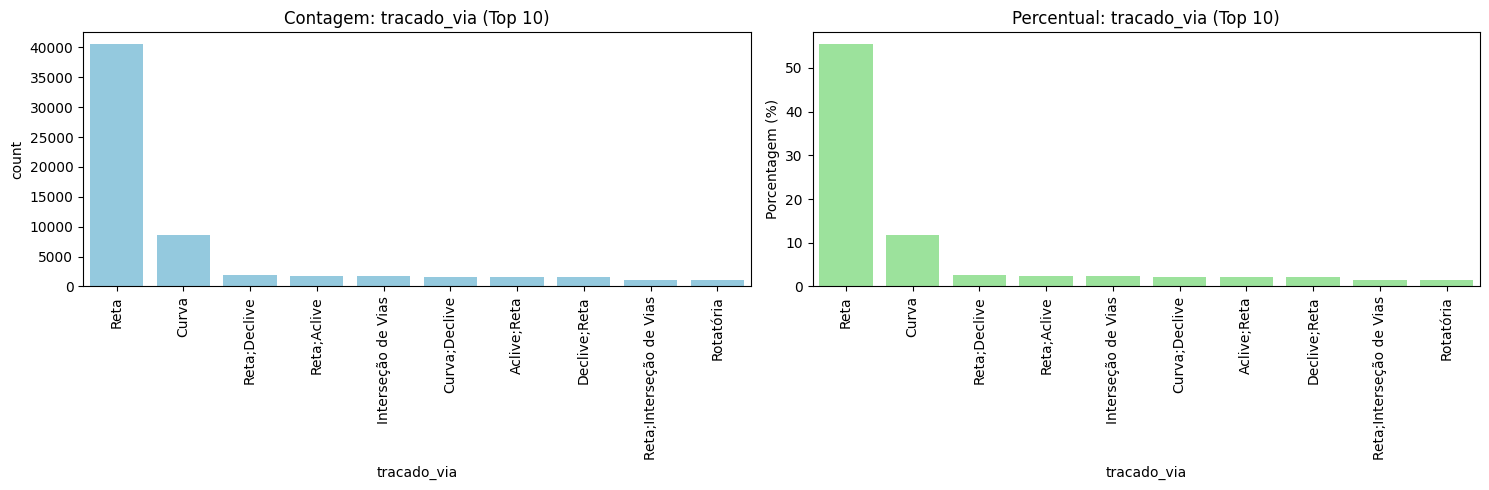

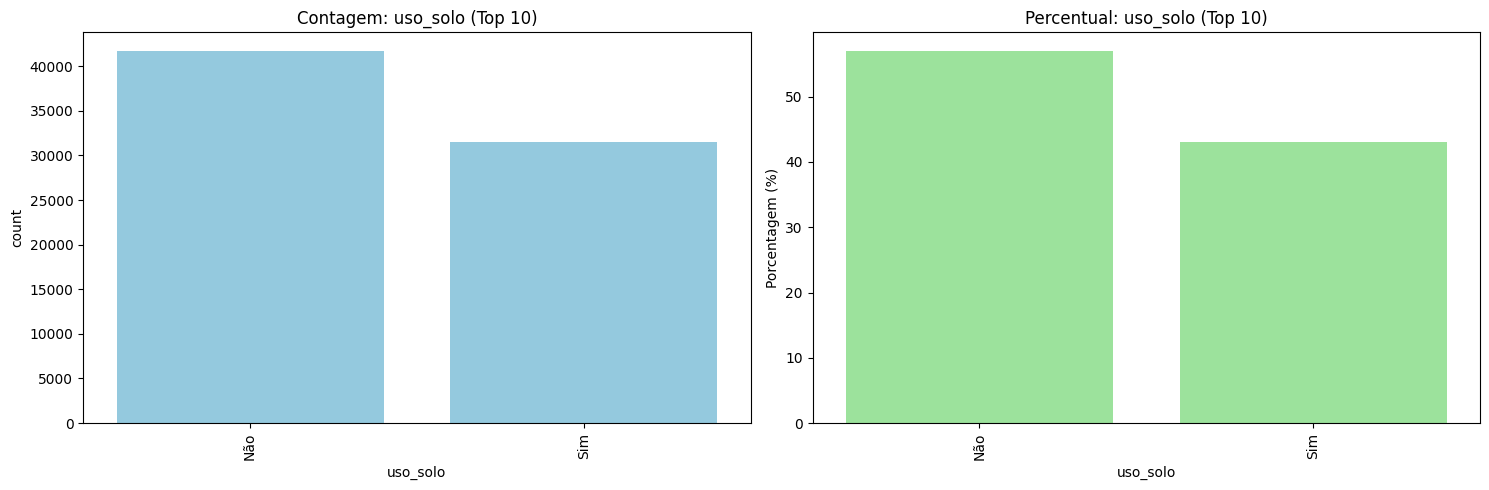

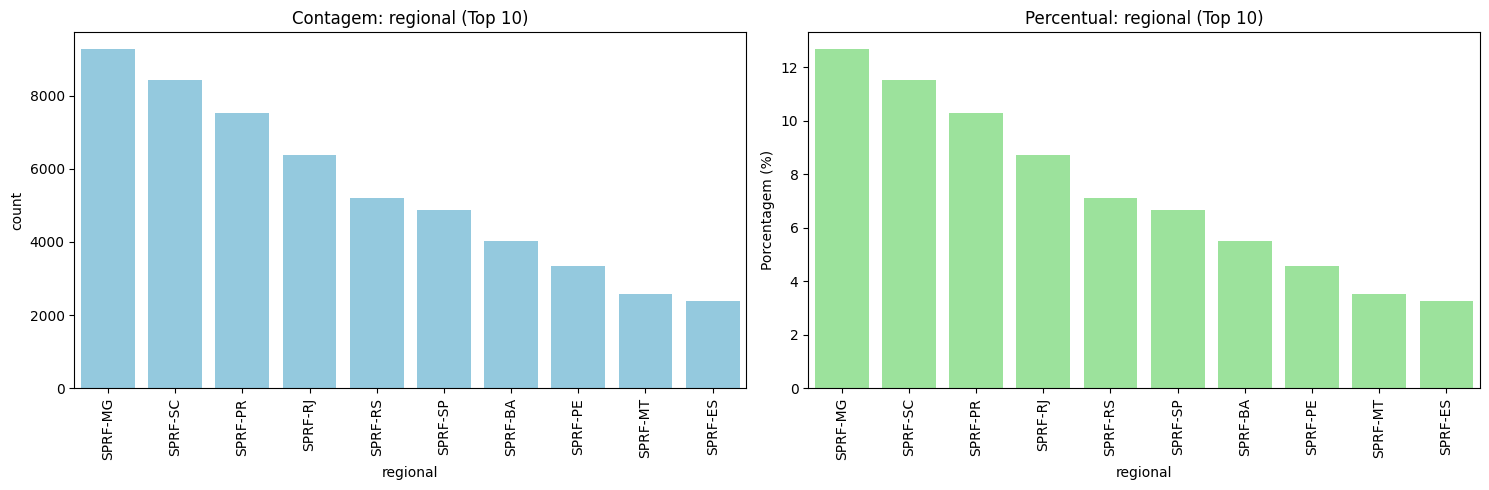

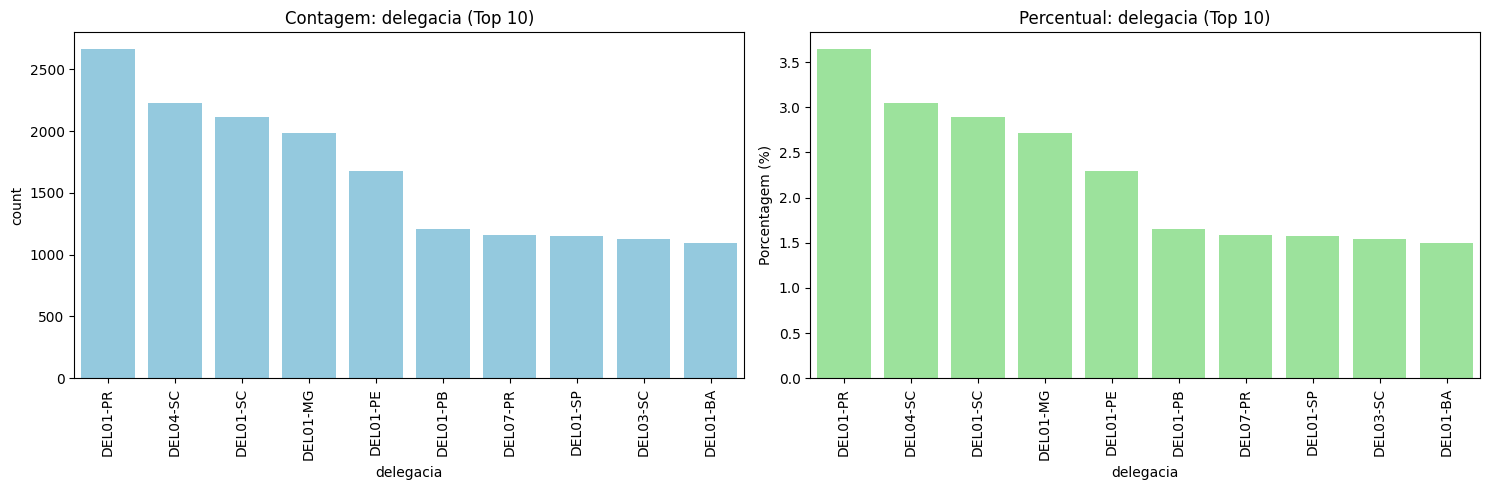

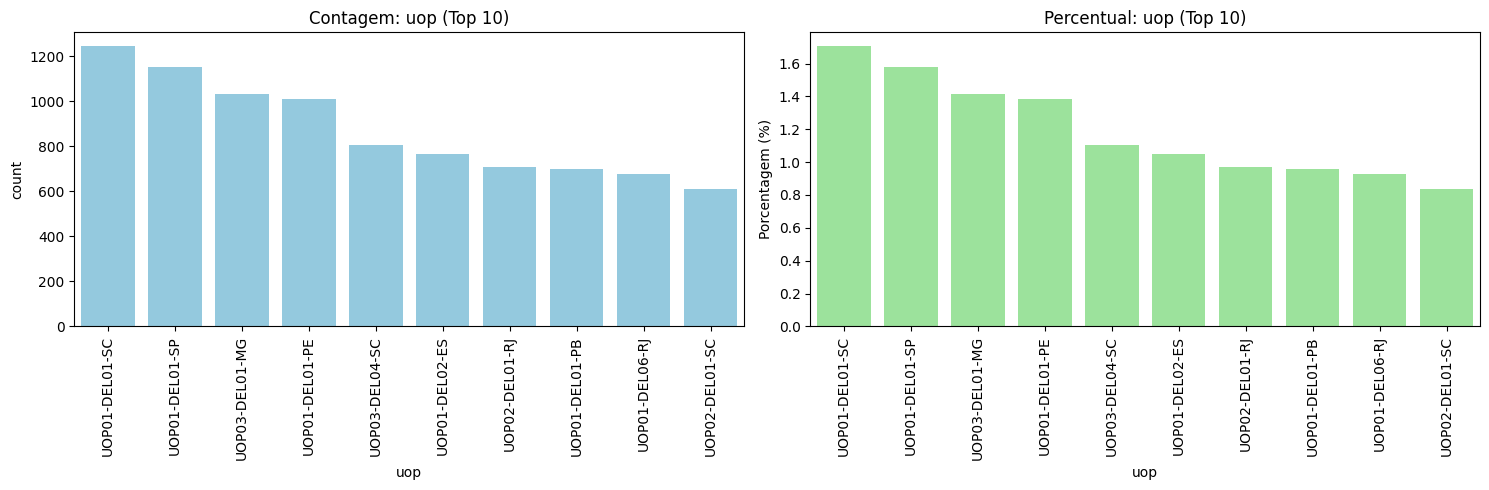

In [14]:
def plot_categoricas_duplo_top(df, top):
    """
    Plota, para cada coluna categórica, 2 gráficos lado a lado:
    1. Contagem absoluta das top categorias
    2. Percentual das top categorias

    Parâmetros:
    - df: DataFrame
    - top: número de categorias mais frequentes a mostrar
    """
    
    for col in categoricos:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Seleciona top categorias
        top_cats = df[col].value_counts().nlargest(top).index

        # Contagem absoluta
        sns.countplot(x=df[col], order=top_cats, color="skyblue", ax=axes[0])
        axes[0].set_title(f'Contagem: {col} (Top {top})')
        axes[0].tick_params(axis='x', rotation=90)

        # Contagem percentual
        counts = df[col].value_counts(normalize=True).loc[top_cats] * 100
        sns.barplot(x=counts.index, y=counts.values, color="lightgreen", ax=axes[1])
        axes[1].set_title(f'Percentual: {col} (Top {top})')
        axes[1].tick_params(axis='x', rotation=90)
        axes[1].set_ylabel('Porcentagem (%)')

        plt.tight_layout()
        plt.show()

plot_categoricas_duplo_top(abt00, 10)

### Variáveis numéricas

In [15]:
# Exploração de variáveis numéricas
def explorar_numericas(df):
    numericas = df.select_dtypes(include=[np.number]).columns
    
    print('VARIÁVEIS NUMÉRICAS:')
    print('='*30)
    
    for col in numericas:
        print(f'\n📊 {col.upper()}:')
        
        # Estatísticas básicas
        stats = df[col].describe()
        print(f"   Mínimo: {stats['min']:,.2f}")
        print(f"   Máximo: {stats['max']:,.2f}")
        print(f"   Média: {stats['mean']:,.2f}")
        print(f"   Mediana: {stats['50%']:,.2f}")
        
        # Verificar valores negativos
        negativos = (df[col] < 0).sum()
        if negativos > 0:
            print(f'   ⚠️ Valores negativos: {negativos:,}')
        
        # Verificar zeros
        zeros = (df[col] == 0).sum()
        if zeros > 0:
            pct_zeros = (zeros / len(df)) * 100
            print(f'   🔵 Valores zero: {zeros:,} ({pct_zeros:.1f}%)')
        
        # Valores únicos
        unique_count = df[col].nunique()
        print(f'   🎯 Valores únicos: {unique_count:,}')

explorar_numericas(abt00)

VARIÁVEIS NUMÉRICAS:

📊 ID:
   Mínimo: 571,772.00
   Máximo: 661,607.00
   Média: 613,003.77
   Mediana: 613,246.50
   🎯 Valores únicos: 73,156

📊 BR:
   Mínimo: 0.00
   Máximo: 495.00
   Média: 209.58
   Mediana: 158.00
   🔵 Valores zero: 186 (0.3%)
   🎯 Valores únicos: 113

📊 PESSOAS:
   Mínimo: 1.00
   Máximo: 93.00
   Média: 2.60
   Mediana: 2.00
   🎯 Valores únicos: 62

📊 MORTOS:
   Mínimo: 0.00
   Máximo: 37.00
   Média: 0.08
   Mediana: 0.00
   🔵 Valores zero: 67,934 (92.9%)
   🎯 Valores únicos: 12

📊 FERIDOS_LEVES:
   Mínimo: 0.00
   Máximo: 83.00
   Média: 0.88
   Mediana: 1.00
   🔵 Valores zero: 27,121 (37.1%)
   🎯 Valores únicos: 35

📊 FERIDOS_GRAVES:
   Mínimo: 0.00
   Máximo: 35.00
   Média: 0.28
   Mediana: 0.00
   🔵 Valores zero: 56,599 (77.4%)
   🎯 Valores únicos: 18

📊 ILESOS:
   Mínimo: 0.00
   Máximo: 78.00
   Média: 1.05
   Mediana: 1.00
   🔵 Valores zero: 27,818 (38.0%)
   🎯 Valores únicos: 53

📊 IGNORADOS:
   Mínimo: 0.00
   Máximo: 33.00
   Média: 0.40
   Mediana

#### Estatística Descritiva

In [16]:
# Estatística descritiva apenas para numéricas
abt00.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000,73156.000000
mean,613003.770340,209.575004,2.597162,0.084204,0.877331,0.278091,1.048103,0.395661,1.155421,1.985811,-18.810858,-46.395744
std,23344.408649,128.818508,2.232573,0.372804,1.126993,0.635996,1.746499,0.822872,1.253310,1.083471,7.722916,6.214783
min,571772.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-33.680584,-72.641548
25%,593042.750000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-25.103899,-50.212551
50%,613246.500000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-20.411868,-47.009041
75%,633190.250000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,-12.588467,-42.184893
max,661607.000000,495.000000,93.000000,37.000000,83.000000,35.000000,78.000000,33.000000,84.000000,26.000000,4.449203,-32.406822


#### Analisando os dados Visualmente 

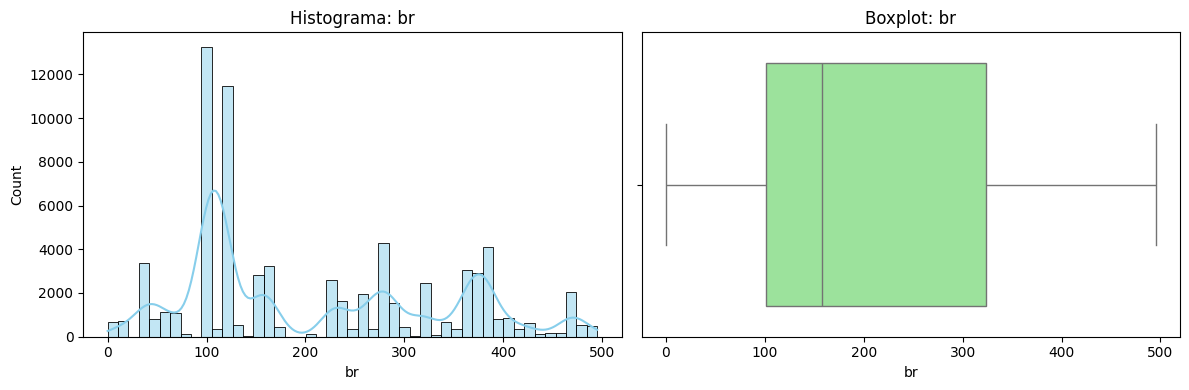

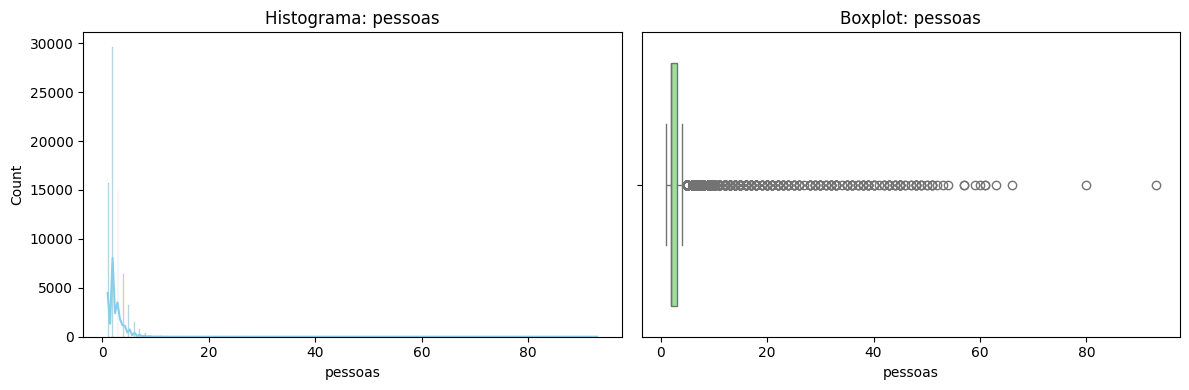

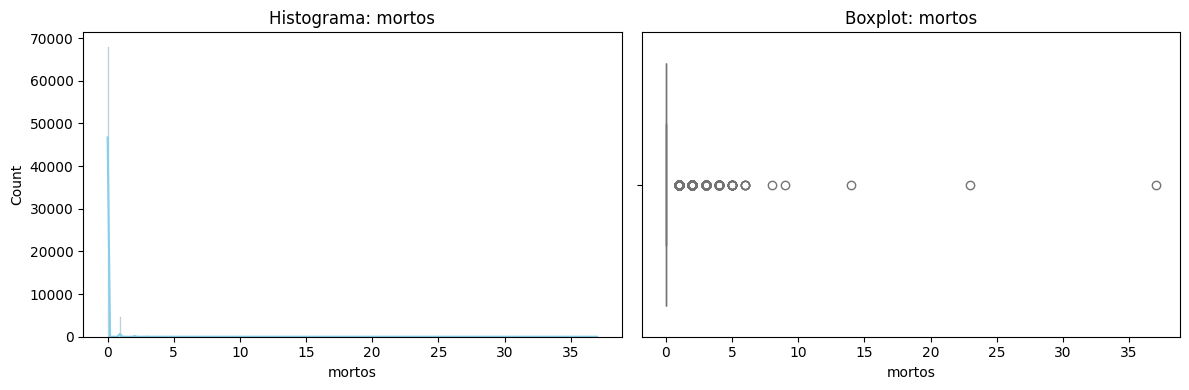

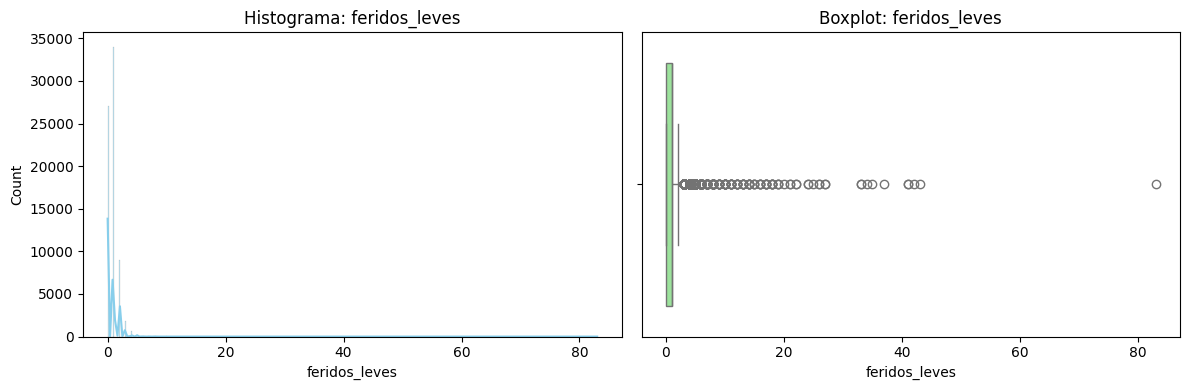

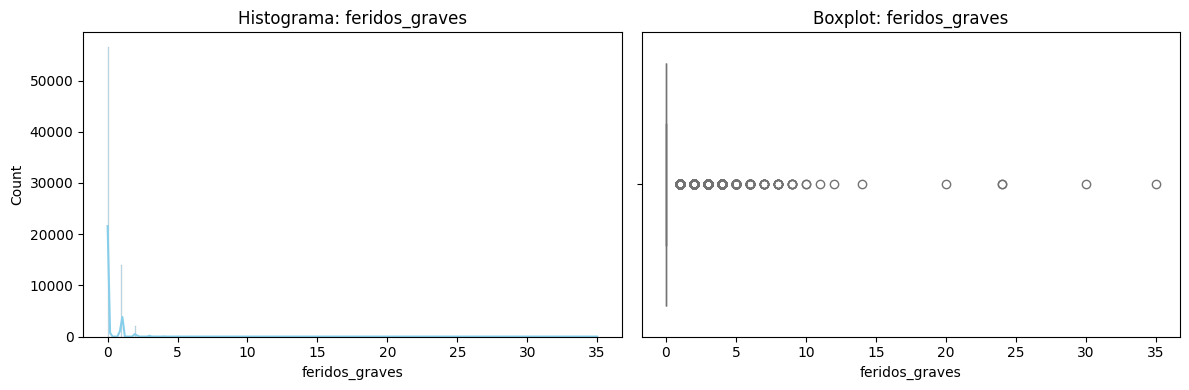

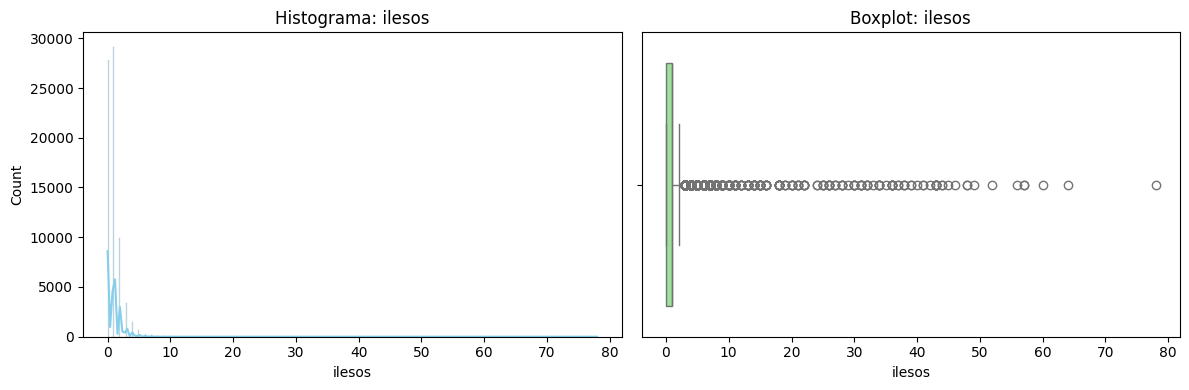

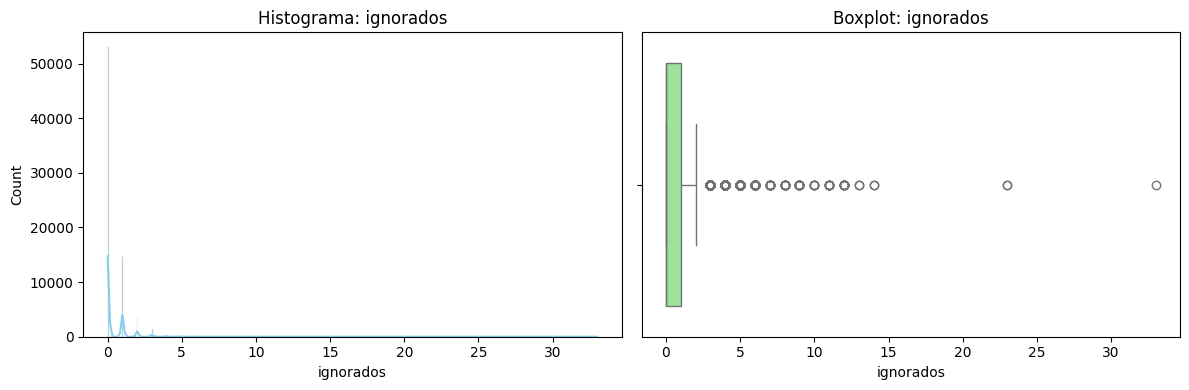

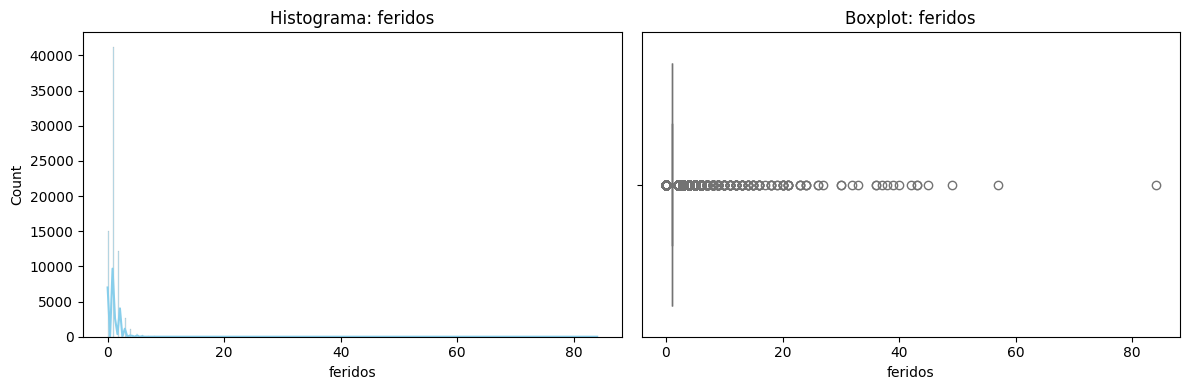

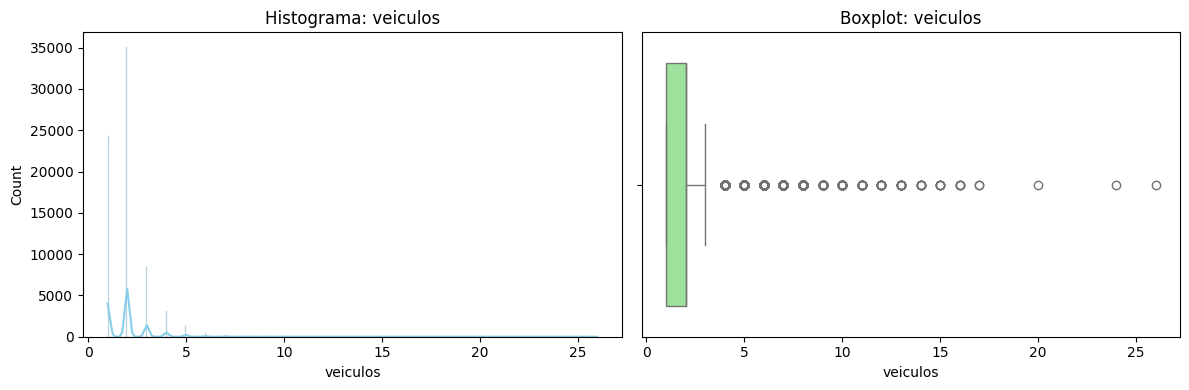

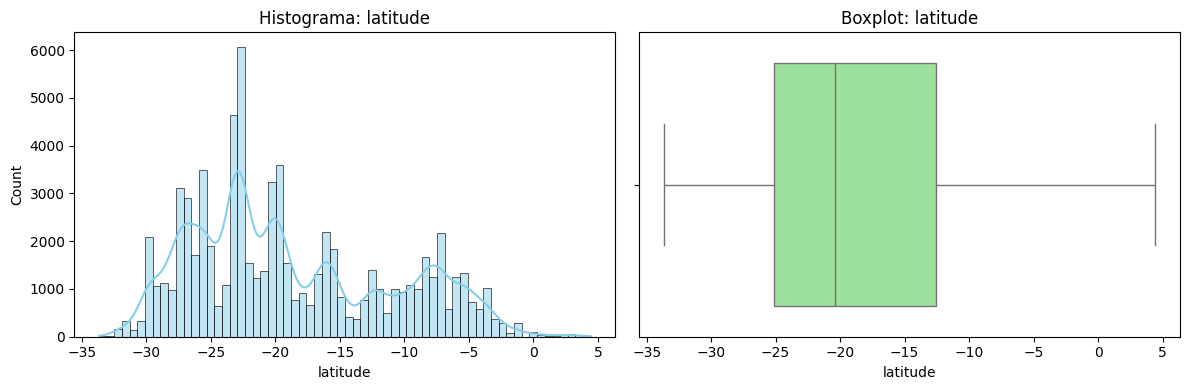

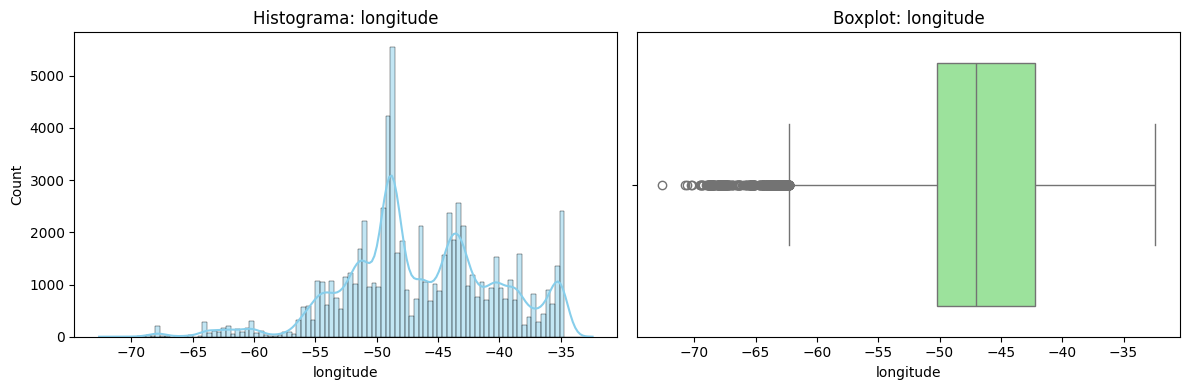

In [17]:
def plot_numericas_duplo(df, colunas=None):
    """
    Plota, para cada coluna numérica, 2 gráficos lado a lado:
    1. Histograma com KDE
    2. Boxplot

    Parâmetros:
    - df: DataFrame
    - colunas: lista de colunas numéricas a plotar (se None, usa todas numéricas)
    """
    if colunas is None:
        colunas = df.select_dtypes(include=['int64', 'float64']).columns

    for col in colunas:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Histograma com KDE
        sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Histograma: {col}')

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot: {col}')

        plt.tight_layout()
        plt.show()
        
plot_numericas_duplo(numericos)

### Análise temporal

In [18]:
# Análise temporal
def analisar_tempo(df):
    print('ANÁLISE TEMPORAL DOS DADOS:')
    print('='*30)
    
    # Procurar colunas de data
    colunas_data = [col for col in df.columns if 'data' in col.lower() or 'date' in col.lower()]
    
    if colunas_data:
        print(f'📋 Colunas de data encontradas: {colunas_data}')
        
        for col in colunas_data:
            print(f'\n📆 Analisando {col}:')
            
            # Tentar converter para datetime
            try:
                if df[col].dtype == 'object':
                    # Amostra dos valores para entender o formato
                    sample_values = df[col].dropna().head(5).tolist()
                    print(f'   Amostra de valores: {sample_values}')
                    
                    # Tentar conversão
                    df_temp = pd.to_datetime(df[col], errors='coerce')
                    
                    if df_temp.notna().sum() > 0:
                        data_min = df_temp.min()
                        data_max = df_temp.max()
                        print(f'   📅 Período: {data_min.date()} até {data_max.date()}')
                        
                        # Calcular duração
                        duracao = data_max - data_min
                        print(f'   ⏱️ Duração: {duracao.days} dias')
                        
                        # Verificar se há dados para todos os dias
                        datas_unicas = df_temp.dt.date.nunique()
                        print(f'   📊 Dias únicos com dados: {datas_unicas:,}')
                    else:
                        print('   ❌ Não foi possível converter para data')
                else:
                    print(f'   ℹ️ Já é tipo numérico: {df[col].dtype}')
                    
            except Exception as e:
                print(f'   ❌ Erro na análise: {e}')
    
    # Procurar colunas de hora
    colunas_hora = [col for col in df.columns if 'hora' in col.lower() or 'time' in col.lower()]
    
    if colunas_hora:
        print(f'\n🕐 Colunas de hora encontradas: {colunas_hora}')
        
        for col in colunas_hora:
            print(f'\n⏰ Analisando {col}:')
            sample_values = df[col].dropna().head(5).tolist()
            print(f'   Amostra: {sample_values}')
            unique_count = df[col].nunique()
            print(f'   Valores únicos: {unique_count:,}')

analisar_tempo(abt00)

ANÁLISE TEMPORAL DOS DADOS:
📋 Colunas de data encontradas: ['data_inversa']

📆 Analisando data_inversa:
   Amostra de valores: ['2024-01-01', '2024-01-01', '2024-01-01', '2024-01-01', '2024-01-01']
   📅 Período: 2024-01-01 até 2024-12-31
   ⏱️ Duração: 365 dias
   📊 Dias únicos com dados: 366

🕐 Colunas de hora encontradas: ['horario']

⏰ Analisando horario:
   Amostra: ['03:56:00', '04:50:00', '04:30:00', '06:30:00', '05:00:00']
   Valores únicos: 1,415


## Resumo

In [19]:
# Síntese completa do entendimento dos dados
def sintese_entendimento(df):
    print("📋 SÍNTESE DO ENTENDIMENTO DOS DADOS")
    print("="*45)
    
    # Informações gerais
    print("\n📊 RESUMO GERAL:")
    print(f"   • Total de registros: {len(df):,}")
    print(f"   • Total de variáveis: {len(df.columns)}")
    print(f"   • Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Tipos de variáveis
    tipos = df.dtypes.value_counts()
    print("\n🏷️ TIPOS DE VARIÁVEIS:")
    for tipo, qtd in tipos.items():
        print(f"   • {tipo}: {qtd} variáveis")
    
    # Qualidade dos dados
    total_nulos = df.isnull().sum().sum()
    pct_nulos = (total_nulos / (len(df) * len(df.columns))) * 100
    
    print("\n🔍 QUALIDADE DOS DADOS:")
    print(f"   • Valores faltantes: {total_nulos:,} ({pct_nulos:.2f}% do total)")
    print(f"   • Registros duplicados: {df.duplicated().sum():,}")

    # Métricas principais de acidentes
    print(" \nMÉTRICAS CRÍTICAS DE SEGURANÇA VIÁRIA")
    print("="*50)

    total_acidentes = len(abt00)
    total_mortos = abt00['mortos'].sum()
    total_feridos = abt00['feridos'].sum()
    total_pessoas = abt00['pessoas'].sum()

    print(f"\n• Total de Acidentes: {total_acidentes:,}")
    print(f"• Total de Mortos: {total_mortos:,}")
    print(f"• Total de Feridos: {total_feridos:,}")
    print(f"• Total de Pessoas Envolvidas: {total_pessoas:,}")
    print(f"• Taxa de Mortalidade: {(total_mortos/total_pessoas*100):.2f}%")
    print(f"• Taxa de Ferimentos: {(total_feridos/total_pessoas*100):.2f}%")

sintese_entendimento(abt00)

📋 SÍNTESE DO ENTENDIMENTO DOS DADOS

📊 RESUMO GERAL:
   • Total de registros: 73,156
   • Total de variáveis: 30
   • Tamanho em memória: 103.9 MB

🏷️ TIPOS DE VARIÁVEIS:
   • object: 18 variáveis
   • int64: 9 variáveis
   • float64: 3 variáveis

🔍 QUALIDADE DOS DADOS:
   • Valores faltantes: 152 (0.01% do total)
   • Registros duplicados: 0
 
MÉTRICAS CRÍTICAS DE SEGURANÇA VIÁRIA

• Total de Acidentes: 73,156
• Total de Mortos: 6,160
• Total de Feridos: 84,526
• Total de Pessoas Envolvidas: 189,998
• Taxa de Mortalidade: 3.24%
• Taxa de Ferimentos: 44.49%


-  Período: 2024-01-01 até 2024-12-31

- Número de observações: Existem 73.156 registros no conjunto de dados. Indica uma Quanidade consideravel de incidentes registrados.

- Valores Nulos: Algumas colunas, como uop, delegacia, regional e classificacao_acidente, têm menos observações do que o total de registros, indicando a presença de valores nulos.

- Incidentes por Dia: O dia com mais incidentes são os dias do Final de semana sendo o 'domingo' (11.741 registros) e o 'sábado' (11.641 registros) , o que pode indicar que têm uma       frequência mais alta de incidentes ou que as pessoas viajam mais nesse dia. 

- Os acidentes ocorreram majoritariamente durante o dia (55,1%) e em condições de céu claro (63,2%) em trafeco de pista 'Simples' (48,2%) e em 'retas' (40.498 registros).

- Tipo de Acidente mais Comum: A "Colisão traseira" é o tipo mais comum de acidente, ocorrendo 13.960 vezes.

- Causa mais Comum: A causa mais frequente de incidentes é a "Reação tardia ou ineficiente do condutor", ocorrendo 10.920 vezes.

- Localização dos Incidentes: A maioria dos incidentes ocorre em Minas Gerais (MG), com 9.296 registros.

- Número de pessoas envolvidas – A média é de 2,6 pessoas por acidente, com registro máximo de 93 pessoas em um único evento.

- A maioria dos acidentes não resultou em óbitos (92,9%), com variação entre 0 e 37 mortes por ocorrência. A média foi de 0,08 e a mediana de 0, indicando predominância de casos sem vítimas fatais.

- A maioria dos acidentes envolveu feridos leves (62,9%), enquanto feridos graves foram raros (77,4% sem casos). O total de feridos ocorreu em 79,4% das ocorrências, e ilesos em 62%, com médias próximas de 1 por acidente e mediana de 0 ou 1, indicando predominância de casos com poucas vítimas